In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns


In [2]:
 plt.style.available

['bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 'tableau-colorblind10',
 '_classic_test']

In [3]:
plt.style.use('seaborn-paper')

In [4]:
# Read Degree File and Create DataFrame
Degree_File = pd.read_csv("degrees-that-pay-back.csv")
Degree_df = pd.DataFrame(Degree_File)

# Read Salaries by college type and Create DataFram
College_Type_File = pd.read_csv("salaries-by-college-type.csv")
College_Type_df = pd.DataFrame(College_Type_File)

#Read Salaries by Region file and Create DataFrame
Region_File = pd.read_csv("salaries-by-region.csv")
Region_df = pd.DataFrame(Region_File)



In [5]:
Degree_df.head()

,Undergraduate Major,Starting Median Salary,Mid-Career Median Salary,Percent change from Starting to Mid-Career Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Accounting,"$46,000.00","$77,100.00",67.6,"$42,200.00","$56,100.00","$108,000.00","$152,000.00"
1,Aerospace Engineering,"$57,700.00","$101,000.00",75.0,"$64,300.00","$82,100.00","$127,000.00","$161,000.00"
2,Agriculture,"$42,600.00","$71,900.00",68.8,"$36,300.00","$52,100.00","$96,300.00","$150,000.00"
3,Anthropology,"$36,800.00","$61,500.00",67.1,"$33,800.00","$45,500.00","$89,300.00","$138,000.00"
4,Architecture,"$41,600.00","$76,800.00",84.6,"$50,600.00","$62,200.00","$97,000.00","$136,000.00"


In [6]:
College_Type_df.head()

,School Name,School Type,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Massachusetts Institute of Technology (MIT),Engineering,"$72,200.00","$126,000.00","$76,800.00","$99,200.00","$168,000.00","$220,000.00"
1,California Institute of Technology (CIT),Engineering,"$75,500.00","$123,000.00",NaN,"$104,000.00","$161,000.00",NaN
2,Harvey Mudd College,Engineering,"$71,800.00","$122,000.00",NaN,"$96,000.00","$180,000.00",NaN
3,"Polytechnic University of New York, Brooklyn",Engineering,"$62,400.00","$114,000.00","$66,800.00","$94,300.00","$143,000.00","$190,000.00"
4,Cooper Union,Engineering,"$62,200.00","$114,000.00",NaN,"$80,200.00","$142,000.00",NaN


In [7]:
Region_df.head()

,School Name,Region,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Stanford University,California,"$70,400.00","$129,000.00","$68,400.00","$93,100.00","$184,000.00","$257,000.00"
1,California Institute of Technology (CIT),California,"$75,500.00","$123,000.00",NaN,"$104,000.00","$161,000.00",NaN
2,Harvey Mudd College,California,"$71,800.00","$122,000.00",NaN,"$96,000.00","$180,000.00",NaN
3,"University of California, Berkeley",California,"$59,900.00","$112,000.00","$59,500.00","$81,000.00","$149,000.00","$201,000.00"
4,Occidental College,California,"$51,900.00","$105,000.00",NaN,"$54,800.00","$157,000.00",NaN


In [8]:
College_Type_df.columns = ['School Name', 'School_Type','str_sal', 'mid_car', 'mid_car_10p', 'mid_car25p', 'mid_car75p', 'mid_car90p']
College_Type_df.head()

,School Name,School_Type,str_sal,mid_car,mid_car_10p,mid_car25p,mid_car75p,mid_car90p
0,Massachusetts Institute of Technology (MIT),Engineering,"$72,200.00","$126,000.00","$76,800.00","$99,200.00","$168,000.00","$220,000.00"
1,California Institute of Technology (CIT),Engineering,"$75,500.00","$123,000.00",NaN,"$104,000.00","$161,000.00",NaN
2,Harvey Mudd College,Engineering,"$71,800.00","$122,000.00",NaN,"$96,000.00","$180,000.00",NaN
3,"Polytechnic University of New York, Brooklyn",Engineering,"$62,400.00","$114,000.00","$66,800.00","$94,300.00","$143,000.00","$190,000.00"
4,Cooper Union,Engineering,"$62,200.00","$114,000.00",NaN,"$80,200.00","$142,000.00",NaN


In [9]:
Salary_Columns = ['str_sal', 'mid_car', 'mid_car_10p', 'mid_car25p', 'mid_car75p', 'mid_car90p']

for x in Salary_Columns:
    College_Type_df[x] = College_Type_df[x].str.replace('$',"")
    College_Type_df[x] = College_Type_df[x].str.replace(",","")
    College_Type_df[x] = pd.to_numeric(College_Type_df[x])
    
College_Type_df.head()

,School Name,School_Type,str_sal,mid_car,mid_car_10p,mid_car25p,mid_car75p,mid_car90p
0,Massachusetts Institute of Technology (MIT),Engineering,72200.0,126000.0,76800.0,99200.0,168000.0,220000.0
1,California Institute of Technology (CIT),Engineering,75500.0,123000.0,NaN,104000.0,161000.0,NaN
2,Harvey Mudd College,Engineering,71800.0,122000.0,NaN,96000.0,180000.0,NaN
3,"Polytechnic University of New York, Brooklyn",Engineering,62400.0,114000.0,66800.0,94300.0,143000.0,190000.0
4,Cooper Union,Engineering,62200.0,114000.0,NaN,80200.0,142000.0,NaN


In [10]:
College_Type_df.describe()

,str_sal,mid_car,mid_car_10p,mid_car25p,mid_car75p,mid_car90p
count,269.000000,269.000000,231.000000,269.000000,269.000000,231.000000
mean,46068.401487,83932.342007,44250.649351,60373.234201,116275.092937,157705.627706
std,6412.616242,14336.191107,8719.612427,11381.348857,22952.334054,34823.348157
min,34800.000000,43900.000000,22600.000000,31800.000000,60900.000000,87600.000000
25%,42000.000000,74000.000000,39000.000000,53200.000000,100000.000000,136000.000000
50%,44700.000000,81600.000000,43100.000000,58400.000000,113000.000000,153000.000000
75%,48300.000000,92200.000000,47400.000000,65100.000000,126000.000000,170500.000000
max,75500.000000,134000.000000,80000.000000,104000.000000,234000.000000,326000.000000


In [11]:
College_Type_df.head()

,School Name,School_Type,str_sal,mid_car,mid_car_10p,mid_car25p,mid_car75p,mid_car90p
0,Massachusetts Institute of Technology (MIT),Engineering,72200.0,126000.0,76800.0,99200.0,168000.0,220000.0
1,California Institute of Technology (CIT),Engineering,75500.0,123000.0,NaN,104000.0,161000.0,NaN
2,Harvey Mudd College,Engineering,71800.0,122000.0,NaN,96000.0,180000.0,NaN
3,"Polytechnic University of New York, Brooklyn",Engineering,62400.0,114000.0,66800.0,94300.0,143000.0,190000.0
4,Cooper Union,Engineering,62200.0,114000.0,NaN,80200.0,142000.0,NaN


In [12]:
College_Type_clean = College_Type_df[['School Name', 'School_Type', 'str_sal', 'mid_car', 'mid_car90p']]
College_Type_clean.head()

,School Name,School_Type,str_sal,mid_car,mid_car90p
0,Massachusetts Institute of Technology (MIT),Engineering,72200.0,126000.0,220000.0
1,California Institute of Technology (CIT),Engineering,75500.0,123000.0,NaN
2,Harvey Mudd College,Engineering,71800.0,122000.0,NaN
3,"Polytechnic University of New York, Brooklyn",Engineering,62400.0,114000.0,190000.0
4,Cooper Union,Engineering,62200.0,114000.0,NaN


In [13]:
College_Type_clean.describe()

,str_sal,mid_car,mid_car90p
count,269.000000,269.000000,231.000000
mean,46068.401487,83932.342007,157705.627706
std,6412.616242,14336.191107,34823.348157
min,34800.000000,43900.000000,87600.000000
25%,42000.000000,74000.000000,136000.000000
50%,44700.000000,81600.000000,153000.000000
75%,48300.000000,92200.000000,170500.000000
max,75500.000000,134000.000000,326000.000000


In [14]:
College_Type_df['School Name'].value_counts()

University of California, Santa Barbara (UCSB)          2
Florida State University (FSU)                          2
University of Illinois at Urbana-Champaign (UIUC)       2
University of Georgia (UGA)                             2
Ohio University                                         2
Pennsylvania State University (PSU)                     2
University of New Hampshire (UNH)                       2
Arizona State University (ASU)                          2
University of Tennessee                                 2
University of Maryland, College Park                    2
State University of New York (SUNY) at Albany           2
West Virginia University (WVU)                          2
Randolph-Macon College                                  2
University of Texas (UT) - Austin                       2
Indiana University (IU), Bloomington                    2
University of Mississippi                               2
University of Alabama, Tuscaloosa                       2
Louisiana Stat

In [15]:
College_Type_df['School_Type'].value_counts()

State           175
Liberal Arts     47
Party            20
Engineering      19
Ivy League        8
Name: School_Type, dtype: int64

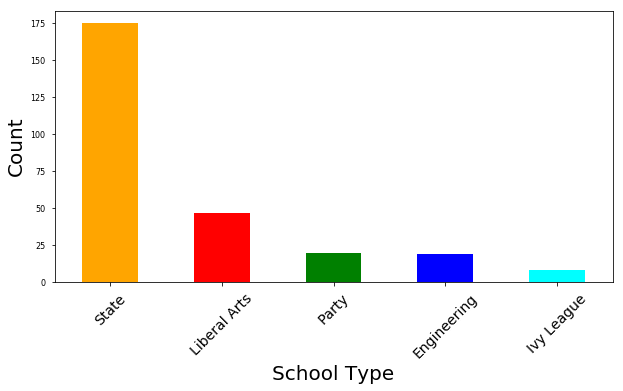

In [16]:
ax = College_Type_df['School_Type'].value_counts().plot(kind='bar',
                                    figsize=(10,5), color=['orange', 'red', 'green', 'blue', 'cyan'])
ax.set_title("", fontsize=20)
ax.set_xlabel("School Type", fontsize=20)
ax.set_ylabel("Count", fontsize=20)
plt.setp(ax.get_xticklabels(), rotation= 45, fontsize=14)

plt.savefig('School_Type_Count.png')

ax

In [17]:
College_Type_df_la = College_Type_clean.loc[College_Type_df['School_Type'] == 'Liberal Arts', :]
College_Type_df_la.head()

,School Name,School_Type,str_sal,mid_car,mid_car90p
39,Bucknell University,Liberal Arts,54100.0,110000.0,251000.0
40,Colgate University,Liberal Arts,52800.0,108000.0,265000.0
41,Amherst College,Liberal Arts,54500.0,107000.0,NaN
42,Lafayette College,Liberal Arts,53900.0,107000.0,204000.0
43,Bowdoin College,Liberal Arts,48100.0,107000.0,NaN


In [18]:
College_Type_df_la.describe()

,str_sal,mid_car,mid_car90p
count,47.000000,47.000000,14.000000
mean,45746.808511,89378.723404,191142.857143
std,4368.854743,12318.172086,42413.454220
min,38500.000000,63900.000000,120000.000000
25%,42250.000000,80850.000000,166000.000000
50%,45500.000000,85800.000000,187000.000000
75%,48600.000000,101500.000000,214000.000000
max,54500.000000,110000.000000,265000.000000


In [19]:
College_Type_df_eng = College_Type_clean.loc[College_Type_df['School_Type'] == 'Engineering', :]
College_Type_df_eng.head()

,School Name,School_Type,str_sal,mid_car,mid_car90p
0,Massachusetts Institute of Technology (MIT),Engineering,72200.0,126000.0,220000.0
1,California Institute of Technology (CIT),Engineering,75500.0,123000.0,NaN
2,Harvey Mudd College,Engineering,71800.0,122000.0,NaN
3,"Polytechnic University of New York, Brooklyn",Engineering,62400.0,114000.0,190000.0
4,Cooper Union,Engineering,62200.0,114000.0,NaN


In [20]:
College_Type_df_eng.describe()

,str_sal,mid_car,mid_car90p
count,19.000000,19.000000,15.000000
mean,59057.894737,103842.105263,173333.333333
std,7842.924326,13840.733594,26794.633436
min,46200.000000,80000.000000,121000.000000
25%,53250.000000,94400.000000,156000.000000
50%,58300.000000,106000.000000,180000.000000
75%,62000.000000,114000.000000,187500.000000
max,75500.000000,126000.000000,220000.000000


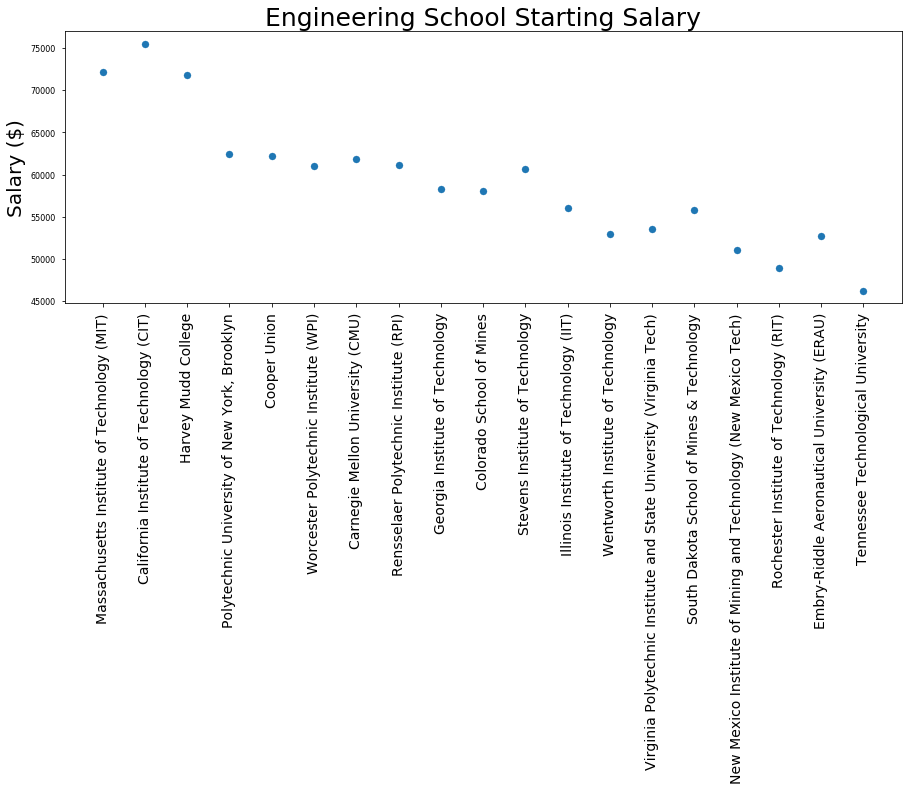

In [21]:
x_axis = np.arange(len(College_Type_df_eng))
tick_locations = [value for value in x_axis]

plt.figure(figsize=(15,5))

plt.scatter(College_Type_df_eng['School Name'], College_Type_df_eng['str_sal'], marker = 'o', s = 50)
plt.title("Engineering School Starting Salary", fontsize=25)
plt.ylabel('Salary ($)', fontsize = 20)

plt.xticks(tick_locations, College_Type_df_eng["School Name"], rotation="vertical", fontsize = 14)






plt.show()

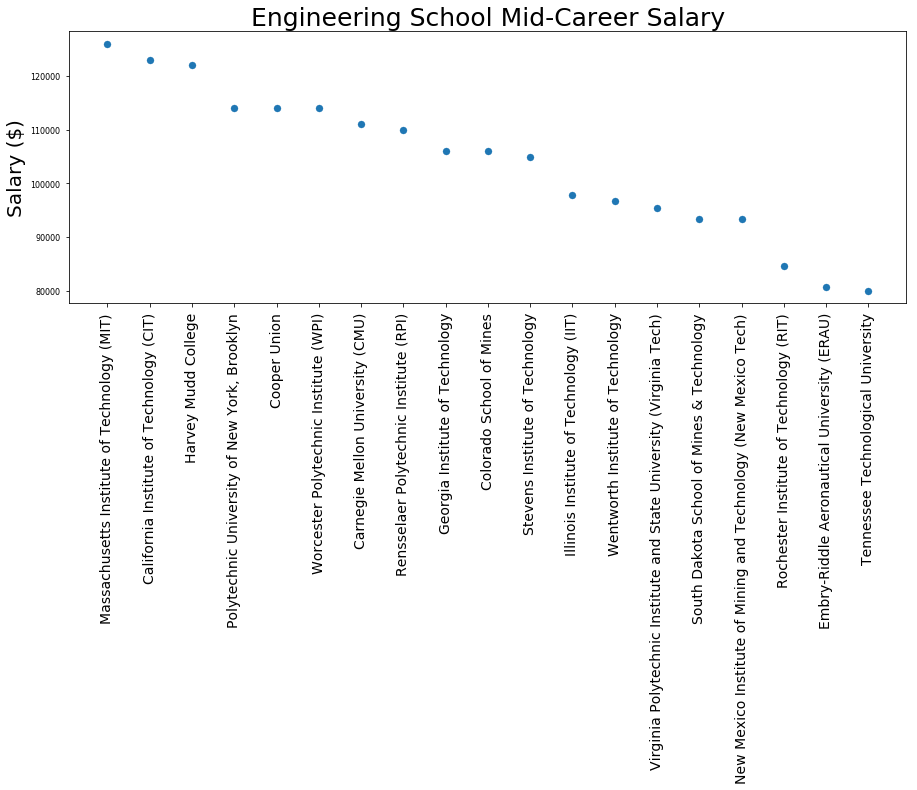

In [22]:
x_axis = np.arange(len(College_Type_df_eng))
tick_locations = [value for value in x_axis]

plt.figure(figsize=(15,5))

plt.scatter(College_Type_df_eng['School Name'], College_Type_df_eng['mid_car'], marker = 'o', s = 50)
plt.title("Engineering School Mid-Career Salary", fontsize=25)
plt.ylabel('Salary ($)', fontsize = 20)

plt.xticks(tick_locations, College_Type_df_eng["School Name"], rotation="vertical", fontsize = 14)






plt.show()

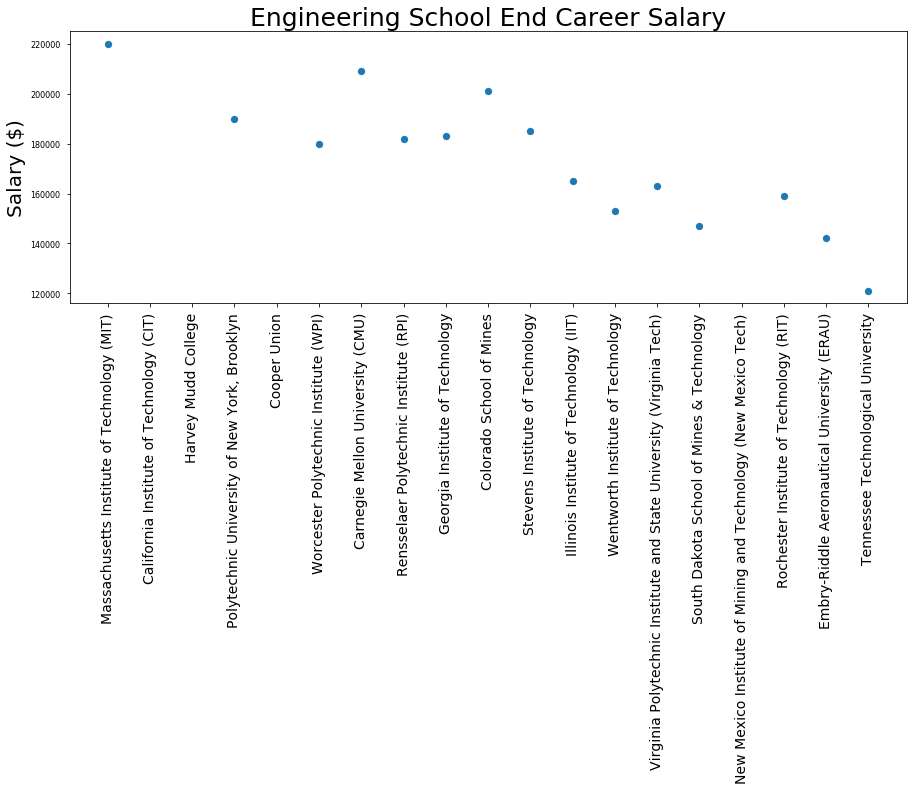

In [23]:
x_axis = np.arange(len(College_Type_df_eng))
tick_locations = [value for value in x_axis]

plt.figure(figsize=(15,5))

plt.scatter(College_Type_df_eng['School Name'], College_Type_df_eng['mid_car90p'], marker = 'o', s = 50)
plt.title("Engineering School End Career Salary", fontsize=25)
plt.ylabel('Salary ($)', fontsize = 20)

plt.xticks(tick_locations, College_Type_df_eng["School Name"], rotation="vertical", fontsize = 14)






plt.show()

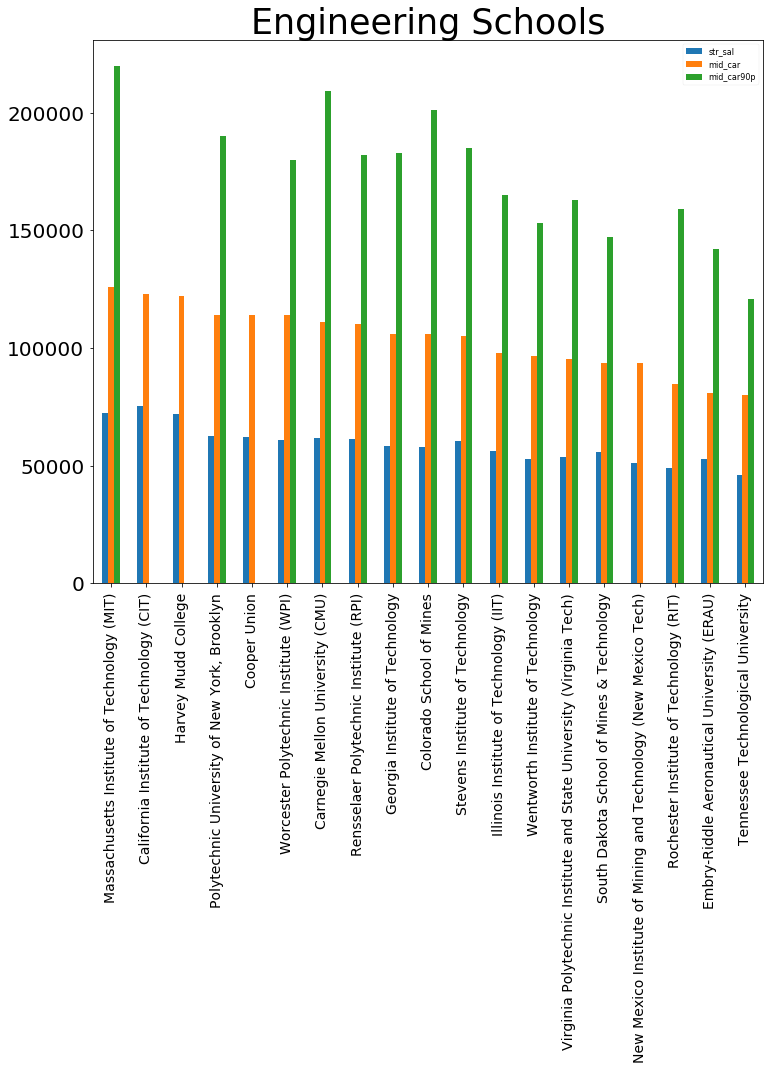

<Figure size 460.8x316.8 with 0 Axes>

In [24]:
College_Type_df_eng.plot(kind="bar", fontsize=20, figsize=(12,10))

# Set a title for the chart
plt.title("Engineering Schools", fontsize=35)
plt.xticks(tick_locations, College_Type_df_eng["School Name"], rotation="vertical", fontsize = 14)


plt.show()
plt.tight_layout()

In [25]:
College_Type_df_party = College_Type_clean.loc[College_Type_df['School_Type'] == 'Party', :]
College_Type_df_party.head()

,School Name,School_Type,str_sal,mid_car,mid_car90p
19,University of Illinois at Urbana-Champaign (UIUC),Party,52900.0,96100.0,177000.0
20,"University of Maryland, College Park",Party,52000.0,95000.0,166000.0
21,"University of California, Santa Barbara (UCSB)",Party,50500.0,95000.0,173000.0
22,University of Texas (UT) - Austin,Party,49700.0,93900.0,188000.0
23,State University of New York (SUNY) at Albany,Party,44500.0,92200.0,209000.0


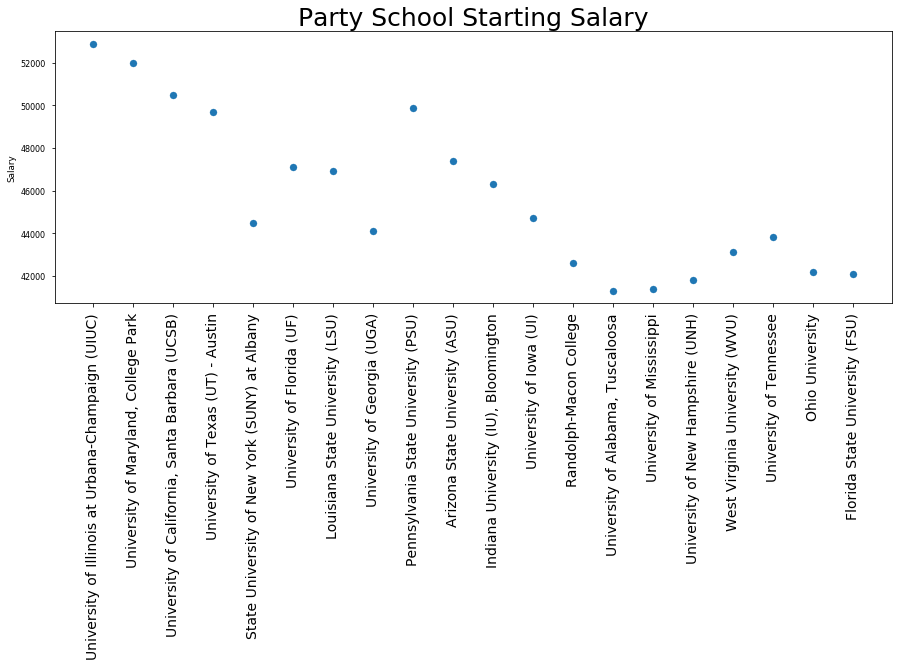

In [26]:
x_axis = np.arange(len(College_Type_df_party))
tick_locations = [value for value in x_axis]

plt.figure(figsize=(15,5))

plt.scatter(College_Type_df_party['School Name'], College_Type_df_party['str_sal'], marker = 'o', s = 50)
plt.title("Party School Starting Salary", fontsize=25)
plt.ylabel('Salary')

plt.xticks(tick_locations, College_Type_df_party["School Name"], rotation="vertical", fontsize = 14)





plt.show()

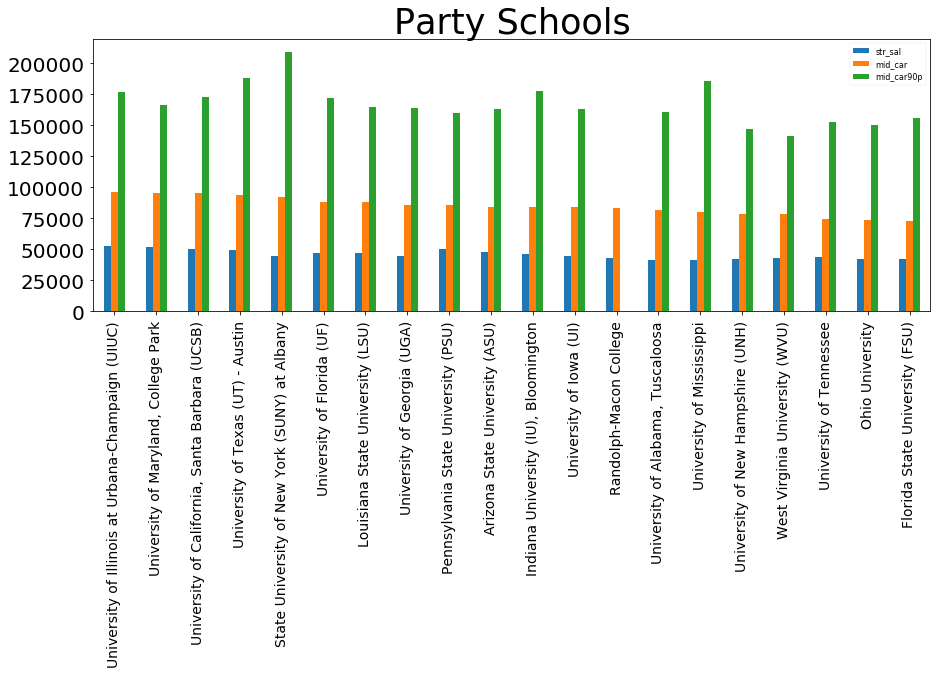

<Figure size 460.8x316.8 with 0 Axes>

In [27]:
College_Type_df_party.plot(kind="bar", fontsize=20, figsize=(15,5))

# Set a title for the chart
plt.title("Party Schools", fontsize=35)
plt.xticks(tick_locations, College_Type_df_party["School Name"], rotation="vertical", fontsize = 14)


plt.show()
plt.tight_layout()

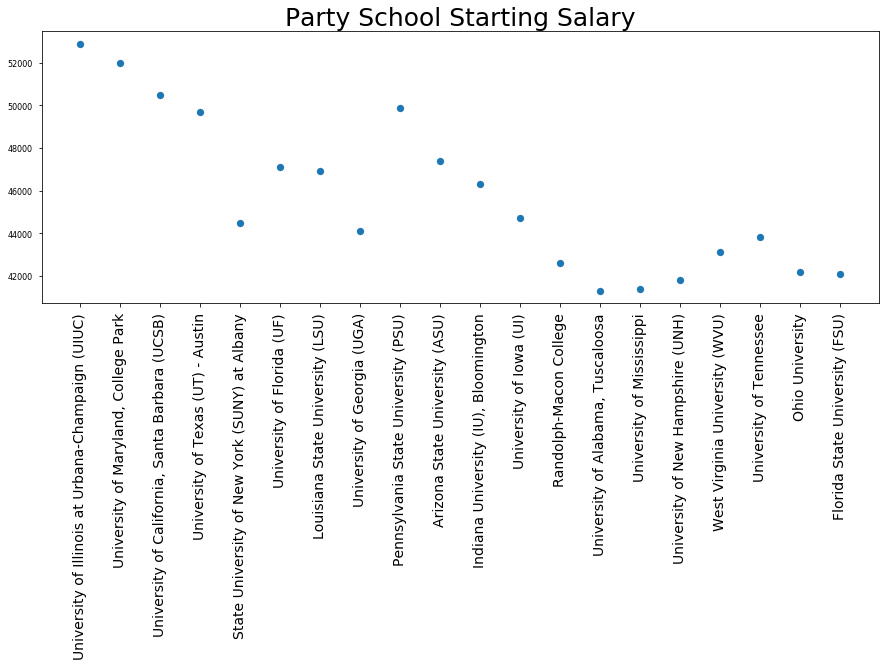

In [28]:
x_axis = np.arange(len(College_Type_df_party))
tick_locations = [value for value in x_axis]

plt.figure(figsize=(15,5))

plt.scatter(College_Type_df_party['School Name'], College_Type_df_party['str_sal'], marker = 'o', s = 50)



plt.xticks(tick_locations, College_Type_df_party["School Name"], rotation="vertical", fontsize = 14)


plt.title("Party School Starting Salary", fontsize=25)





plt.show()

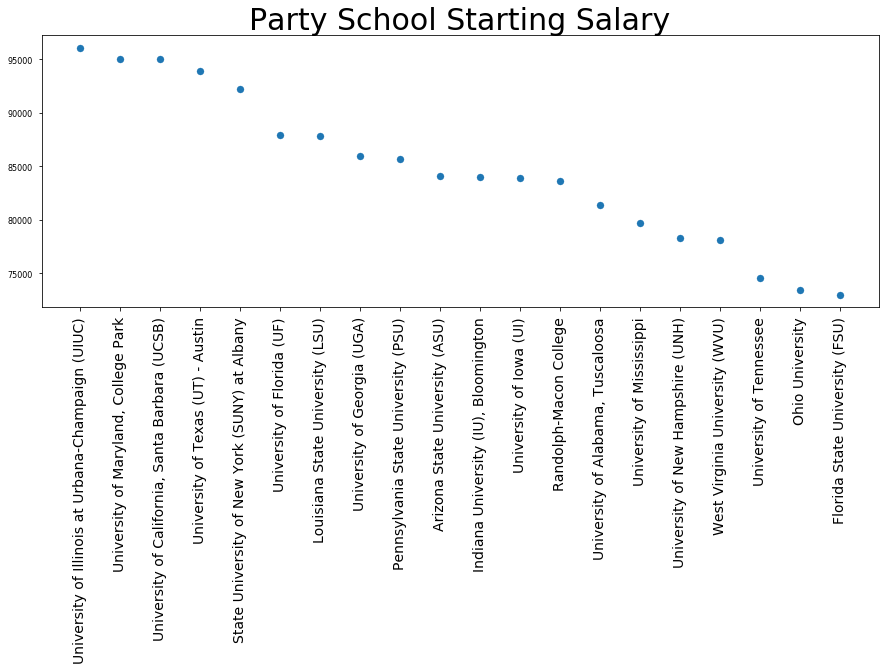

In [29]:
x_axis = np.arange(len(College_Type_df_party))
tick_locations = [value for value in x_axis]

plt.figure(figsize=(15,5))

plt.scatter(College_Type_df_party['School Name'], College_Type_df_party['mid_car'], marker = 'o', s = 50)



plt.xticks(tick_locations, College_Type_df_party["School Name"], rotation="vertical", fontsize = 14)


plt.title("Party School Starting Salary", fontsize=30)





plt.show()

In [30]:
College_Type_df_party.dtypes

School Name     object
School_Type     object
str_sal        float64
mid_car        float64
mid_car90p     float64
dtype: object

In [31]:
College_Type_df_party.describe()
                                                

,str_sal,mid_car,mid_car90p
count,20.00000,20.000000,19.000000
mean,45715.00000,84685.000000,166947.368421
std,3685.71567,7237.568289,16091.659966
min,41300.00000,73000.000000,141000.000000
25%,42500.00000,79350.000000,158000.000000
50%,44600.00000,84050.000000,164000.000000
75%,47975.00000,88975.000000,175000.000000
max,52900.00000,96100.000000,209000.000000


In [32]:
College_Type_df_State = College_Type_clean.loc[College_Type_df['School_Type'] == 'State', :]
College_Type_df_State.head()

,School Name,School_Type,str_sal,mid_car,mid_car90p
94,"University of California, Berkeley",State,59900.0,112000.0,201000.0
95,University of Virginia (UVA),State,52700.0,103000.0,215000.0
96,Cal Poly San Luis Obispo,State,57200.0,101000.0,178000.0
97,University of California at Los Angeles (UCLA),State,52600.0,101000.0,193000.0
98,"University of California, San Diego (UCSD)",State,51100.0,101000.0,177000.0


In [33]:
College_Type_df_State.describe()

,str_sal,mid_car,mid_car90p
count,175.000000,175.000000,175.000000
mean,44126.285714,78567.428571,147571.428571
std,4269.067495,10296.072330,22642.391981
min,34800.000000,43900.000000,87600.000000
25%,41400.000000,71800.000000,132000.000000
50%,43600.000000,78500.000000,147000.000000
75%,46300.000000,84450.000000,161500.000000
max,59900.000000,112000.000000,215000.000000


In [34]:
College_Type_df_State.count()

School Name    175
School_Type    175
str_sal        175
mid_car        175
mid_car90p     175
dtype: int64

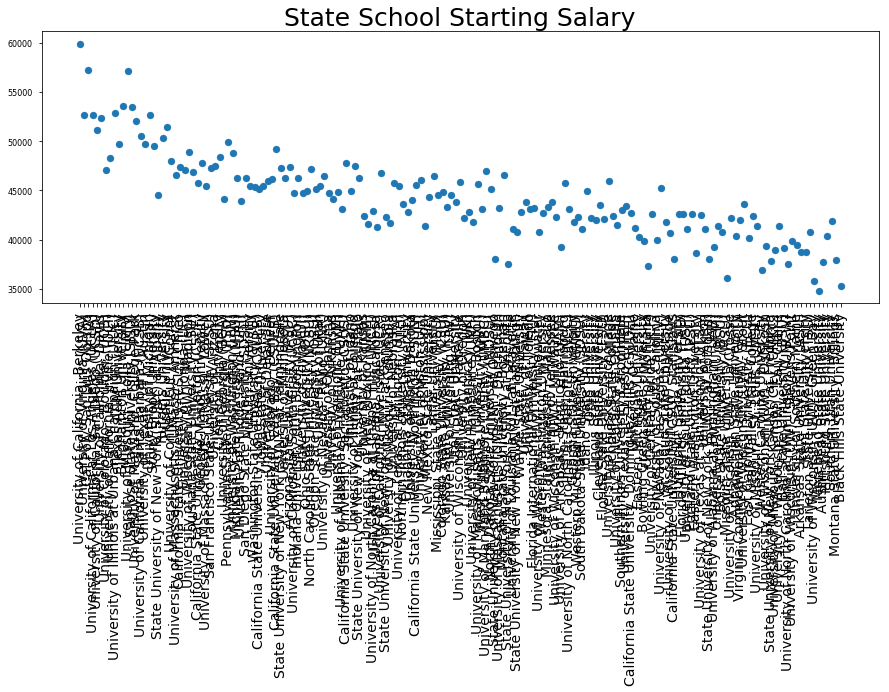

<Figure size 460.8x316.8 with 0 Axes>

In [35]:
x_axis = np.arange(len(College_Type_df_State))
tick_locations = [value for value in x_axis]

plt.figure(figsize=(15,5))

plt.scatter(College_Type_df_State['School Name'], College_Type_df_State['str_sal'], marker = 'o', s = 50)
plt.title("State School Starting Salary", fontsize=25)


plt.xticks(tick_locations, College_Type_df_State["School Name"], rotation="vertical", fontsize = 14)






plt.show()
plt.tight_layout()

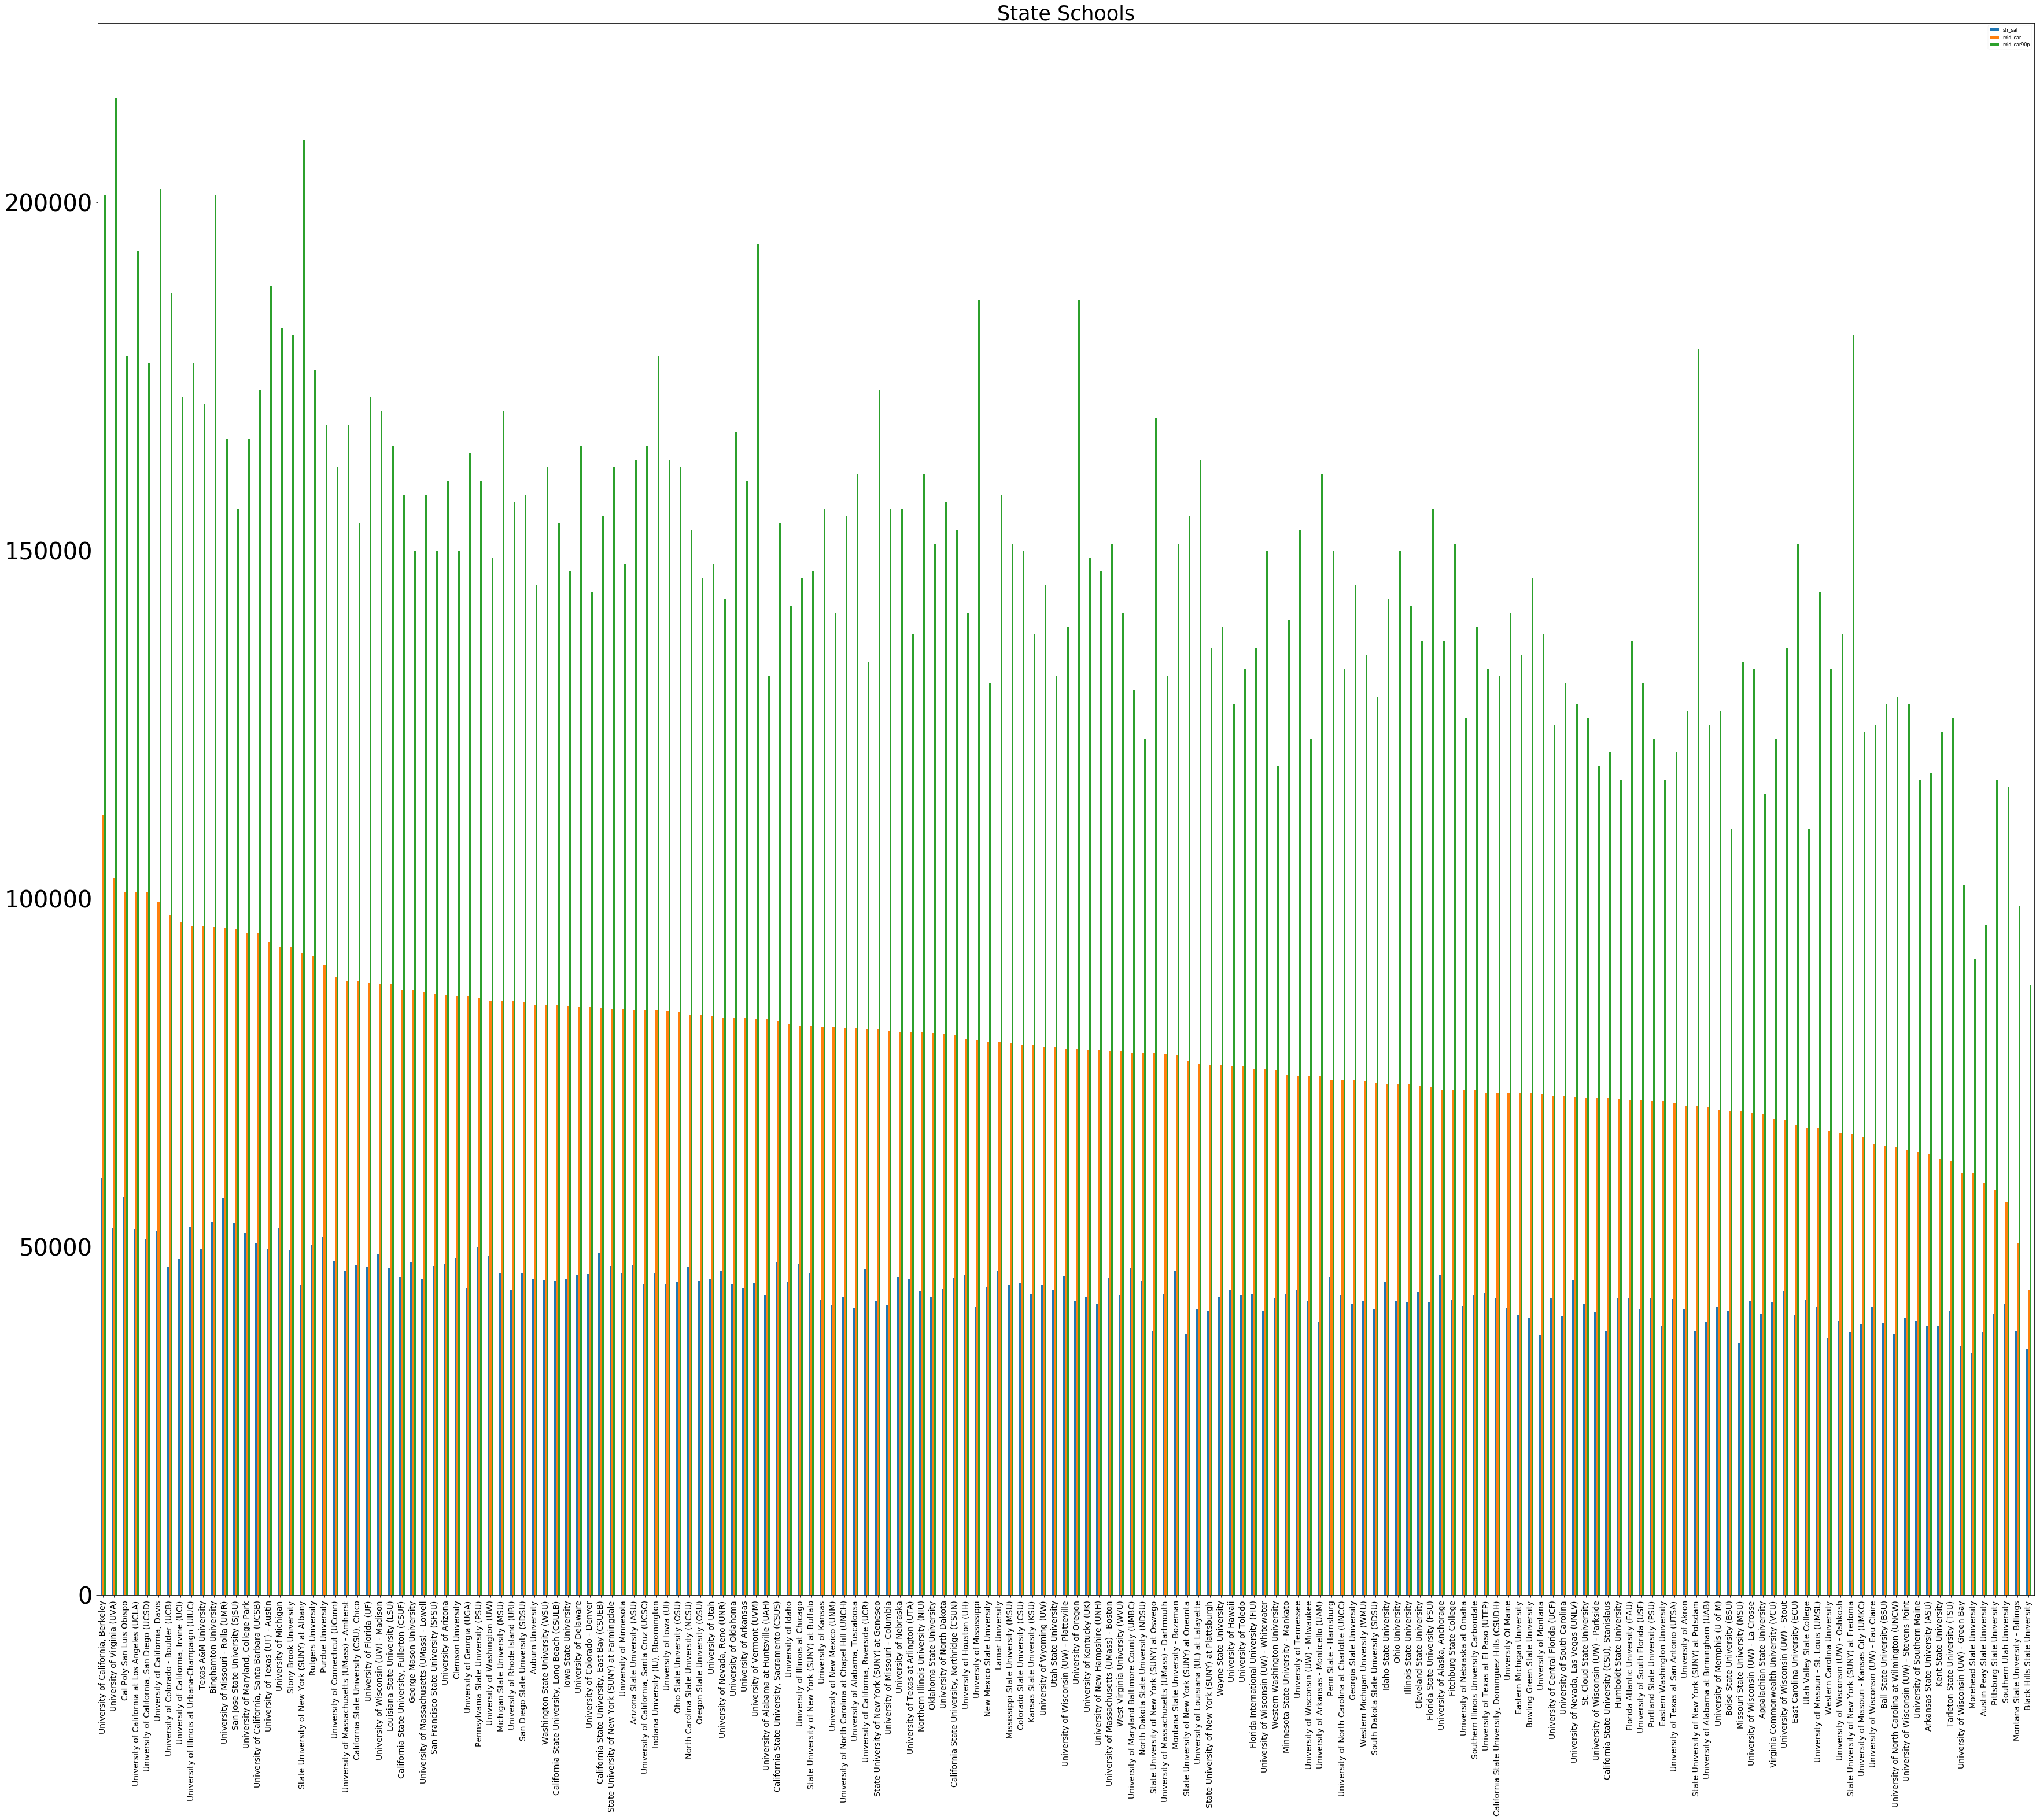

<Figure size 460.8x316.8 with 0 Axes>

In [36]:
College_Type_df_State.plot(kind="bar", fontsize=40, figsize=(60,50))

# Set a title for the chart
plt.title("State Schools", fontsize=35)
plt.xticks(tick_locations, College_Type_df_State["School Name"], rotation="vertical", fontsize = 14)


plt.show()
plt.tight_layout()

In [37]:
College_Type_df_Ivy = College_Type_clean.loc[College_Type_df['School_Type'] == 'Ivy League']
College_Type_df_Ivy

,School Name,School_Type,str_sal,mid_car,mid_car90p
86,Dartmouth College,Ivy League,58000.0,134000.0,321000.0
87,Princeton University,Ivy League,66500.0,131000.0,261000.0
88,Yale University,Ivy League,59100.0,126000.0,326000.0
89,Harvard University,Ivy League,63400.0,124000.0,288000.0
90,University of Pennsylvania,Ivy League,60900.0,120000.0,282000.0
91,Cornell University,Ivy League,60300.0,110000.0,210000.0
92,Brown University,Ivy League,56200.0,109000.0,228000.0
93,Columbia University,Ivy League,59400.0,107000.0,241000.0


In [38]:
College_Type_df_Ivy.describe()

,str_sal,mid_car,mid_car90p
count,8.000000,8.000000,8.000000
mean,60475.000000,120125.000000,269625.000000
std,3218.584427,10412.046594,42240.594896
min,56200.000000,107000.000000,210000.000000
25%,58825.000000,109750.000000,237750.000000
50%,59850.000000,122000.000000,271500.000000
75%,61525.000000,127250.000000,296250.000000
max,66500.000000,134000.000000,326000.000000


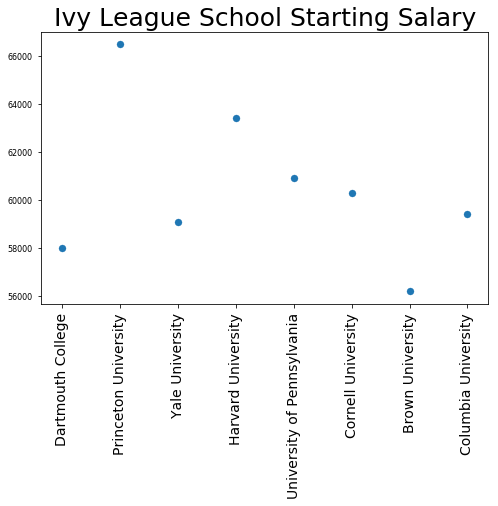

<Figure size 460.8x316.8 with 0 Axes>

In [39]:
x_axis = np.arange(len(College_Type_df_Ivy))
tick_locations = [value for value in x_axis]

plt.figure(figsize=(8,5))

plt.scatter(College_Type_df_Ivy['School Name'], College_Type_df_Ivy['str_sal'], marker = 'o', s = 50)
plt.title("Ivy League School Starting Salary", fontsize=25)


plt.xticks(tick_locations, College_Type_df_Ivy["School Name"], rotation="vertical", fontsize = 14)






plt.show()
plt.tight_layout()

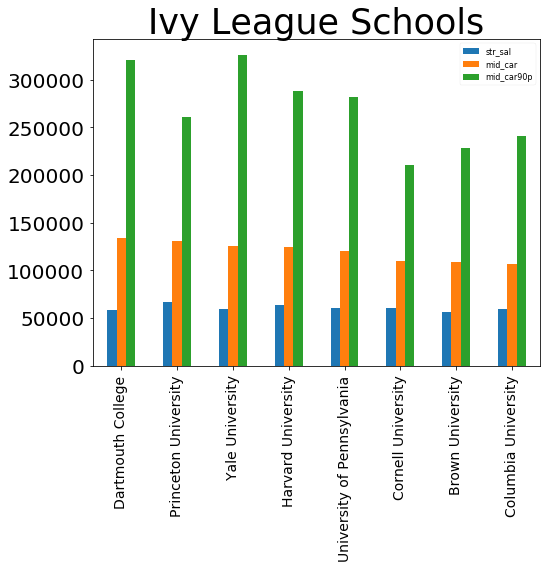

In [40]:
College_Type_df_Ivy.plot(kind="bar", fontsize=20, figsize = (8,6))

# Set a title for the chart
plt.title("Ivy League Schools", fontsize=35)
plt.xticks(tick_locations, College_Type_df_Ivy["School Name"], rotation="vertical", fontsize = 14)



plt.show()


In [41]:
College_Type_df_Ivy.describe()

,str_sal,mid_car,mid_car90p
count,8.000000,8.000000,8.000000
mean,60475.000000,120125.000000,269625.000000
std,3218.584427,10412.046594,42240.594896
min,56200.000000,107000.000000,210000.000000
25%,58825.000000,109750.000000,237750.000000
50%,59850.000000,122000.000000,271500.000000
75%,61525.000000,127250.000000,296250.000000
max,66500.000000,134000.000000,326000.000000


In [42]:
College_Type_sort_df = College_Type_df.sort_values('School_Type')
College_Type_sort_df.head()

,School Name,School_Type,str_sal,mid_car,mid_car_10p,mid_car25p,mid_car75p,mid_car90p
0,Massachusetts Institute of Technology (MIT),Engineering,72200.0,126000.0,76800.0,99200.0,168000.0,220000.0
18,Tennessee Technological University,Engineering,46200.0,80000.0,42100.0,62600.0,99500.0,121000.0
17,Embry-Riddle Aeronautical University (ERAU),Engineering,52700.0,80700.0,49800.0,64000.0,106000.0,142000.0
16,Rochester Institute of Technology (RIT),Engineering,48900.0,84600.0,45000.0,62100.0,112000.0,159000.0
15,New Mexico Institute of Mining and Technology ...,Engineering,51000.0,93400.0,NaN,67400.0,123000.0,NaN


In [43]:
College_Type_sort_df.describe()

,str_sal,mid_car,mid_car_10p,mid_car25p,mid_car75p,mid_car90p
count,269.000000,269.000000,231.000000,269.000000,269.000000,231.000000
mean,46068.401487,83932.342007,44250.649351,60373.234201,116275.092937,157705.627706
std,6412.616242,14336.191107,8719.612427,11381.348857,22952.334054,34823.348157
min,34800.000000,43900.000000,22600.000000,31800.000000,60900.000000,87600.000000
25%,42000.000000,74000.000000,39000.000000,53200.000000,100000.000000,136000.000000
50%,44700.000000,81600.000000,43100.000000,58400.000000,113000.000000,153000.000000
75%,48300.000000,92200.000000,47400.000000,65100.000000,126000.000000,170500.000000
max,75500.000000,134000.000000,80000.000000,104000.000000,234000.000000,326000.000000


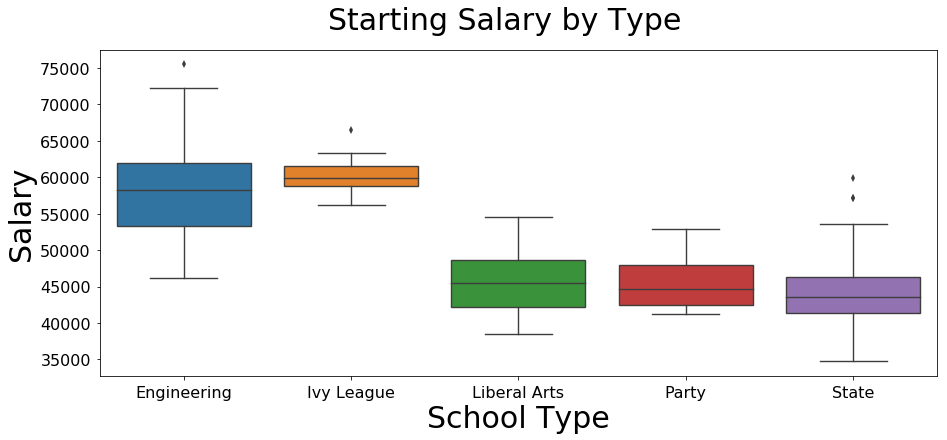

<Figure size 460.8x316.8 with 0 Axes>

In [44]:
plt.figure(figsize=(15,6))
sns.boxplot(x='School_Type', y='str_sal', data=College_Type_sort_df)
plt.ylabel('Salary', fontsize=30)
plt.xlabel('School Type', fontsize=30)
plt.suptitle("Starting Salary by Type", fontsize=30)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)

plt.show()

plt.savefig('Starting_Salary_Boxplot.png')




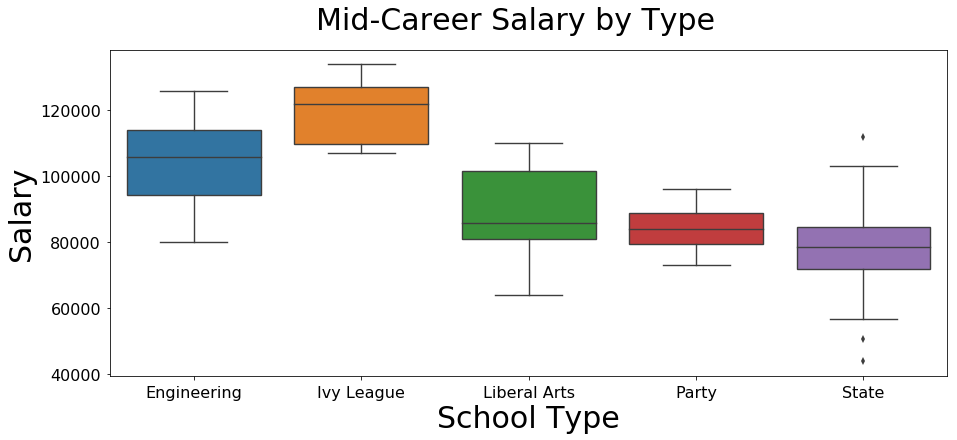

<Figure size 460.8x316.8 with 0 Axes>

In [45]:
plt.figure(figsize=(15,6))
sns.boxplot(x='School_Type', y='mid_car', data=College_Type_sort_df)
plt.ylabel('Salary', fontsize=30)
plt.xlabel('School Type', fontsize=30)
plt.suptitle("Mid-Career Salary by Type", fontsize=30)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)


plt.show()

plt.savefig('Mid-Career_Salary_Boxplot.png')

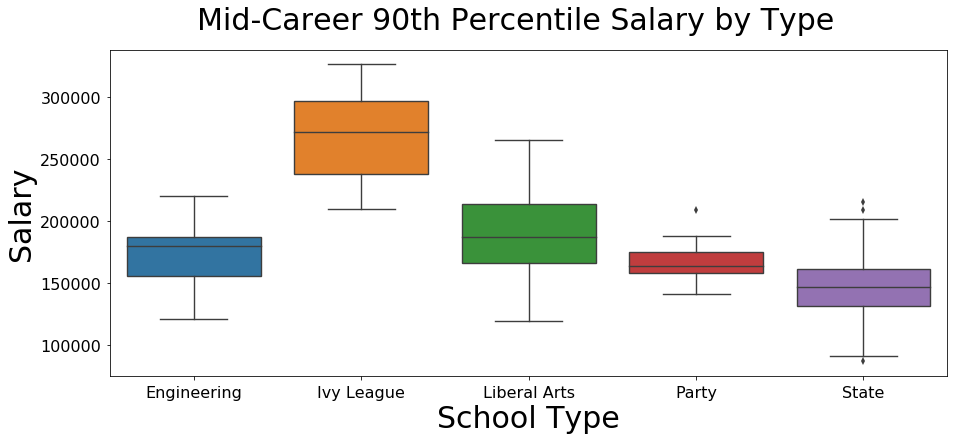

<Figure size 460.8x316.8 with 0 Axes>

In [46]:
plt.figure(figsize=(15,6))
sns.boxplot(x='School_Type', y='mid_car90p', data=College_Type_sort_df)
plt.ylabel('Salary', fontsize=30)
plt.xlabel('School Type', fontsize=30)
plt.suptitle("Mid-Career 90th Percentile Salary by Type", fontsize=30)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)


plt.show()

plt.savefig('Mid-Career_90p_Salary_Boxplot.png')

In [47]:
str_grp_1 = College_Type_sort_df[College_Type_sort_df['School_Type'] == 'Engineering']['str_sal']
str_grp_2 = College_Type_sort_df[College_Type_sort_df['School_Type'] == 'Ivy League']['str_sal']
str_grp_3 = College_Type_sort_df[College_Type_sort_df['School_Type'] == 'Liberal Arts']['str_sal']
str_grp_4 = College_Type_sort_df[College_Type_sort_df['School_Type'] == 'Party']['str_sal']
str_grp_5 = College_Type_sort_df[College_Type_sort_df['School_Type'] == 'State']['str_sal']

In [48]:
stats.f_oneway(str_grp_1,str_grp_2,str_grp_3,str_grp_4,str_grp_5)

F_onewayResult(statistic=66.56143762415526, pvalue=7.056857278200541e-39)

In [49]:
stats.f_oneway(str_grp_3,str_grp_4,str_grp_5)

F_onewayResult(statistic=3.489162573095272, pvalue=0.03209052128949348)

In [50]:
mid_grp_1 = College_Type_sort_df[College_Type_sort_df['School_Type'] == 'Engineering']['mid_car']
mid_grp_2 = College_Type_sort_df[College_Type_sort_df['School_Type'] == 'Ivy League']['mid_car']
mid_grp_3 = College_Type_sort_df[College_Type_sort_df['School_Type'] == 'Liberal Arts']['mid_car']
mid_grp_4 = College_Type_sort_df[College_Type_sort_df['School_Type'] == 'Party']['mid_car']
mid_grp_5 = College_Type_sort_df[College_Type_sort_df['School_Type'] == 'State']['mid_car']

In [51]:
stats.f_oneway(mid_grp_1,mid_grp_2,mid_grp_3,mid_grp_4,mid_grp_5)

F_onewayResult(statistic=52.69435553283492, pvalue=1.3498549868153782e-32)

In [52]:
stats.f_oneway(mid_grp_3,mid_grp_4,mid_grp_5)

F_onewayResult(statistic=20.80312103538241, pvalue=4.687254214829738e-09)

In [53]:
College_Type_df_la_sort = College_Type_df_la.sort_values('mid_car90p')
College_Type_df_la_sort

,School Name,School_Type,str_sal,mid_car,mid_car90p
85,Evergreen State College,Liberal Arts,39500.0,63900.0,120000.0
71,University of Puget Sound,Liberal Arts,46600.0,81500.0,137000.0
82,Lewis & Clark College,Liberal Arts,38900.0,72600.0,140000.0
76,Ursinus College,Liberal Arts,42100.0,80000.0,160000.0
65,Smith College,Liberal Arts,44000.0,83900.0,184000.0
60,DePauw University,Liberal Arts,41400.0,88300.0,185000.0
61,St. Olaf College,Liberal Arts,45300.0,86200.0,185000.0
64,Siena College,Liberal Arts,45500.0,85200.0,189000.0
42,Lafayette College,Liberal Arts,53900.0,107000.0,204000.0
55,University of Richmond,Liberal Arts,48600.0,94600.0,211000.0


In [54]:
College_drop_la_nan = College_Type_df_la_sort.dropna()
College_drop_la_nan

,School Name,School_Type,str_sal,mid_car,mid_car90p
85,Evergreen State College,Liberal Arts,39500.0,63900.0,120000.0
71,University of Puget Sound,Liberal Arts,46600.0,81500.0,137000.0
82,Lewis & Clark College,Liberal Arts,38900.0,72600.0,140000.0
76,Ursinus College,Liberal Arts,42100.0,80000.0,160000.0
65,Smith College,Liberal Arts,44000.0,83900.0,184000.0
60,DePauw University,Liberal Arts,41400.0,88300.0,185000.0
61,St. Olaf College,Liberal Arts,45300.0,86200.0,185000.0
64,Siena College,Liberal Arts,45500.0,85200.0,189000.0
42,Lafayette College,Liberal Arts,53900.0,107000.0,204000.0
55,University of Richmond,Liberal Arts,48600.0,94600.0,211000.0


In [55]:
College_Type_df_party_sort = College_Type_df_party.sort_values('mid_car90p')
College_Type_df_party_sort

,School Name,School_Type,str_sal,mid_car,mid_car90p
35,West Virginia University (WVU),Party,43100.0,78100.0,141000.0
34,University of New Hampshire (UNH),Party,41800.0,78300.0,147000.0
37,Ohio University,Party,42200.0,73400.0,150000.0
36,University of Tennessee,Party,43800.0,74600.0,153000.0
38,Florida State University (FSU),Party,42100.0,73000.0,156000.0
27,Pennsylvania State University (PSU),Party,49900.0,85700.0,160000.0
32,"University of Alabama, Tuscaloosa",Party,41300.0,81400.0,161000.0
30,University of Iowa (UI),Party,44700.0,83900.0,163000.0
28,Arizona State University (ASU),Party,47400.0,84100.0,163000.0
26,University of Georgia (UGA),Party,44100.0,86000.0,164000.0


In [56]:
College_drop_party_nan = College_Type_df_party_sort.dropna()
College_drop_party_nan

,School Name,School_Type,str_sal,mid_car,mid_car90p
35,West Virginia University (WVU),Party,43100.0,78100.0,141000.0
34,University of New Hampshire (UNH),Party,41800.0,78300.0,147000.0
37,Ohio University,Party,42200.0,73400.0,150000.0
36,University of Tennessee,Party,43800.0,74600.0,153000.0
38,Florida State University (FSU),Party,42100.0,73000.0,156000.0
27,Pennsylvania State University (PSU),Party,49900.0,85700.0,160000.0
32,"University of Alabama, Tuscaloosa",Party,41300.0,81400.0,161000.0
30,University of Iowa (UI),Party,44700.0,83900.0,163000.0
28,Arizona State University (ASU),Party,47400.0,84100.0,163000.0
26,University of Georgia (UGA),Party,44100.0,86000.0,164000.0


In [57]:
College_Type_df_state_sort = College_Type_df_State.sort_values('mid_car90p')
College_Type_df_state_sort

,School Name,School_Type,str_sal,mid_car,mid_car90p
268,Black Hills State University,State,35300.0,43900.0,87600.0
263,Morehead State University,State,34800.0,60600.0,91300.0
264,Austin Peay State University,State,37700.0,59200.0,96200.0
267,Montana State University - Billings,State,37900.0,50600.0,98900.0
262,University of Wisconsin (UW) - Green Bay,State,35800.0,60600.0,102000.0
241,Boise State University (BSU),State,40800.0,69500.0,110000.0
248,Utah Valley State College,State,42400.0,67100.0,110000.0
244,Appalachian State University,State,40400.0,69100.0,115000.0
266,Southern Utah University,State,41900.0,56500.0,116000.0
258,University of Southern Maine,State,39400.0,63600.0,117000.0


In [58]:
mid90_grp_1 = College_Type_sort_df[College_Type_sort_df['School_Type'] == 'Engineering']['mid_car90p']
mid90_grp_2 = College_Type_sort_df[College_Type_sort_df['School_Type'] == 'Ivy League']['mid_car90p']
mid90_grp_3 = College_drop_la_nan[College_drop_la_nan['School_Type'] == 'Liberal Arts']['mid_car90p']
mid90_grp_4 = College_drop_party_nan[College_drop_party_nan['School_Type'] == 'Party']['mid_car90p']
mid90_grp_5 = College_Type_sort_df[College_Type_sort_df['School_Type'] == 'State']['mid_car90p']

In [59]:
stats.f_oneway(mid90_grp_3,mid90_grp_4,mid90_grp_5)

F_onewayResult(statistic=25.449032901884067, pvalue=1.3424648394930842e-10)

In [60]:
stats.f_oneway(mid90_grp_1,mid90_grp_2,mid90_grp_3,mid90_grp_4,mid90_grp_5)

F_onewayResult(statistic=nan, pvalue=nan)

In [61]:
College_Type_df_eng_sort = College_Type_df_eng.sort_values('mid_car90p')
College_Type_df_eng_sort

,School Name,School_Type,str_sal,mid_car,mid_car90p
18,Tennessee Technological University,Engineering,46200.0,80000.0,121000.0
17,Embry-Riddle Aeronautical University (ERAU),Engineering,52700.0,80700.0,142000.0
14,South Dakota School of Mines & Technology,Engineering,55800.0,93400.0,147000.0
12,Wentworth Institute of Technology,Engineering,53000.0,96700.0,153000.0
16,Rochester Institute of Technology (RIT),Engineering,48900.0,84600.0,159000.0
13,Virginia Polytechnic Institute and State Unive...,Engineering,53500.0,95400.0,163000.0
11,Illinois Institute of Technology (IIT),Engineering,56000.0,97800.0,165000.0
5,Worcester Polytechnic Institute (WPI),Engineering,61000.0,114000.0,180000.0
7,Rensselaer Polytechnic Institute (RPI),Engineering,61100.0,110000.0,182000.0
8,Georgia Institute of Technology,Engineering,58300.0,106000.0,183000.0


In [62]:
College_drop_eng_nan = College_Type_df_eng_sort.dropna()
College_drop_eng_nan

,School Name,School_Type,str_sal,mid_car,mid_car90p
18,Tennessee Technological University,Engineering,46200.0,80000.0,121000.0
17,Embry-Riddle Aeronautical University (ERAU),Engineering,52700.0,80700.0,142000.0
14,South Dakota School of Mines & Technology,Engineering,55800.0,93400.0,147000.0
12,Wentworth Institute of Technology,Engineering,53000.0,96700.0,153000.0
16,Rochester Institute of Technology (RIT),Engineering,48900.0,84600.0,159000.0
13,Virginia Polytechnic Institute and State Unive...,Engineering,53500.0,95400.0,163000.0
11,Illinois Institute of Technology (IIT),Engineering,56000.0,97800.0,165000.0
5,Worcester Polytechnic Institute (WPI),Engineering,61000.0,114000.0,180000.0
7,Rensselaer Polytechnic Institute (RPI),Engineering,61100.0,110000.0,182000.0
8,Georgia Institute of Technology,Engineering,58300.0,106000.0,183000.0


In [63]:
stats.ttest_ind(College_Type_df_eng.str_sal, College_Type_df_Ivy.str_sal, equal_var=False)

Ttest_indResult(statistic=-0.6656410541408333, pvalue=0.511736896647387)

In [64]:
stats.ttest_ind(College_Type_df_eng.mid_car, College_Type_df_Ivy.mid_car, equal_var=False)

Ttest_indResult(statistic=-3.3493863569633513, pvalue=0.0036770710503318317)

In [65]:
stats.ttest_ind(College_drop_eng_nan.mid_car90p, College_Type_df_Ivy.mid_car90p, equal_var=False)

Ttest_indResult(statistic=-5.850414363588488, pvalue=0.0001556619533814355)

In [66]:
#Percent Increase from starting salary to Mid-Career Salary Liberal Arts
la_start_mid_change = (College_Type_df_la['mid_car'].mean() - College_Type_df_la['str_sal'].mean())/College_Type_df_la['str_sal'].mean()
la_start_mid_change

0.9537695921119946

In [67]:
#Percent Increase from starting salary to Mid-Career Salary Party
party_start_mid_change = (College_Type_df_party['mid_car'].mean() - College_Type_df_party['str_sal'].mean())/College_Type_df_party['str_sal'].mean()
party_start_mid_change

0.8524554303839003

In [68]:
#Percent Increase from starting salary to Mid-Career Salary State
State_start_mid_change = (College_Type_df_State['mid_car'].mean() - College_Type_df_State['str_sal'].mean())/College_Type_df_State['str_sal'].mean()
State_start_mid_change

0.7805130728687789

In [69]:
#Percent Increase from starting salary to Mid-Career Salary Ivy League
Ivy_start_mid_change =(College_Type_df_Ivy['mid_car'].mean() - College_Type_df_Ivy['str_sal'].mean())/College_Type_df_Ivy['str_sal'].mean()
Ivy_start_mid_change

0.9863579991732121

In [70]:
#Percent Increase from starting salary to Mid-Career Salary Engineering
eng_start_mid_change = (College_Type_df_eng['mid_car'].mean() - College_Type_df_eng['str_sal'].mean())/College_Type_df_eng['str_sal'].mean()
eng_start_mid_change

0.7583103110239728

In [71]:
#Percent Increase from mid-career Salary to Mid-Career 90th Percentile Liberal Arts
la_mid_mid90_change =(College_Type_df_la['mid_car90p'].mean() - College_Type_df_la['mid_car'].mean())/College_Type_df_la['mid_car'].mean()
la_mid_mid90_change

1.138572244742498

In [72]:
#Percent Increase from mid-career Salary to Mid-Career 90th Percentile Party
party_mid_mid90_change =(College_Type_df_party['mid_car90p'].mean() - College_Type_df_party['mid_car'].mean())/College_Type_df_party['mid_car'].mean()
party_mid_mid90_change

0.9713924357448502

In [73]:
#Percent Increase from mid-career Salary to Mid-Career 90th Percentile State
state_mid_mid90_change =(College_Type_df_State['mid_car90p'].mean() - College_Type_df_State['mid_car'].mean())/College_Type_df_State['mid_car'].mean()
state_mid_mid90_change

0.8782774395787425

In [74]:
#Percent Increase from mid-career Salary to Mid-Career 90th Percentile Ivy League
Ivy_mid_mid90_change =(College_Type_df_Ivy['mid_car90p'].mean() - College_Type_df_Ivy['mid_car'].mean())/College_Type_df_Ivy['mid_car'].mean()
Ivy_mid_mid90_change

1.2445369406867846

In [75]:
#Percent Increase from mid-career Salary to Mid-Career 90th Percentile Engineering
eng_mid_mid90_change =(College_Type_df_eng['mid_car90p'].mean() - College_Type_df_eng['mid_car'].mean())/College_Type_df_eng['mid_car'].mean()
eng_mid_mid90_change

0.6692008785267783

In [76]:
start_mid_list= [la_start_mid_change, party_start_mid_change, eng_start_mid_change, Ivy_start_mid_change, State_start_mid_change]
start_mid_list

[0.9537695921119946,
 0.8524554303839003,
 0.7583103110239728,
 0.9863579991732121,
 0.7805130728687789]

In [77]:
mid_mid90_list = [la_mid_mid90_change, party_mid_mid90_change , eng_mid_mid90_change, Ivy_mid_mid90_change, state_mid_mid90_change]
mid_mid90_list

[1.138572244742498,
 0.9713924357448502,
 0.6692008785267783,
 1.2445369406867846,
 0.8782774395787425]

In [78]:
percent_change_dic = {' Start_to_Mid' : [la_start_mid_change,party_start_mid_change,eng_start_mid_change,Ivy_start_mid_change
                                     ,State_start_mid_change],
           'Mid-Career_to_Mid90th_Percentile' : [la_mid_mid90_change, party_mid_mid90_change, eng_mid_mid90_change, Ivy_mid_mid90_change,
                                                 state_mid_mid90_change],
                                    'School Type' : ['Liberal Arts', 'Party', 'Engineering', 'Ivy League', 'State']}
percent_change_df = pd.DataFrame(percent_change_dic)
percent_change_df.index = percent_change_df['School Type']
del percent_change_df['School Type']
percent_change_df

,Start_to_Mid,Mid-Career_to_Mid90th_Percentile
School Type,,
Liberal Arts,0.953770,1.138572
Party,0.852455,0.971392
Engineering,0.758310,0.669201
Ivy League,0.986358,1.244537
State,0.780513,0.878277


In [79]:
percent_change_df_sort = percent_change_df.sort_values(by='Mid-Career_to_Mid90th_Percentile')
percent_change_df_sort

,Start_to_Mid,Mid-Career_to_Mid90th_Percentile
School Type,,
Engineering,0.758310,0.669201
State,0.780513,0.878277
Party,0.852455,0.971392
Liberal Arts,0.953770,1.138572
Ivy League,0.986358,1.244537


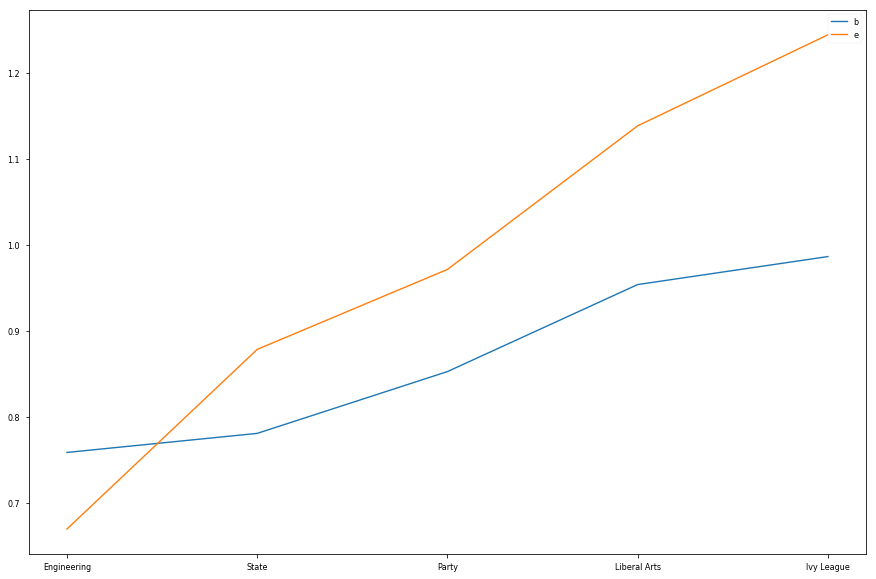

In [80]:
plt.figure(figsize=(15,10))
plt.plot(percent_change_df_sort)
plt.legend('best')